In [126]:
import pandas as pd

#import yahoo finance library whch will contain all relevant stock data
import yfinance as yf

#Afinn will help us determine the sentiment of any phrases that we pass through it
from afinn import Afinn

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [225]:
#Download link for the 'Company.csv'
company_url = 'https://uofi.box.com/s/i0u9t815khodmkam36rtot8t8cga9tg8'

#Download link for the 'Company_Tweet.csv'
company_tweet_url = "https://uofi.box.com/s/v4ywudafxya3j5ibl015xim1lca8ka1x"

#Down load link for the 'Tweet.csv'
tweet_url = "https://uofi.box.com/s/m1rbqakns8rt2akv0bpauih7wowuj8vm"

#When downloading these documents be sure to have them all in the same directory as the code you are running to ensure proper execution

#This dataset contains the compannies that this project will be referring to
company = pd.read_csv("Company.csv")

In [226]:
company

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [129]:
#This dataset contains the id for each tweet that has been collected and states which company is being refrenced
company_tweet = pd.read_csv("Company_Tweet.csv")

In [130]:
company_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [131]:
#This dataset contains the tweet ids, the tweet, the author, when the tweet was posted, and all the information regarding likes and comments
tweet = pd.read_csv("Tweet.csv")

In [132]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [133]:
#Here I merge the datasets so that I dont have to refrence multiple datasets in order to determine what company the tweet is referring to
tweets = pd.merge(tweet,company_tweet,on='tweet_id',how='inner')
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL
...,...,...,...,...,...,...,...,...
4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA
4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL
4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT


In [134]:
def test_dataset_size():
    
    # Read the data file
    data = pd.read_csv('Tweet.csv')

    #Compare to actual results
    actual_cols = 7
    tested_cols = 0

    for col in data:
        tested_cols += 1
        
    assert actual_cols == tested_cols, 'Number of rows do not equal {}'.format(actual_cols)

    #Print a success statement
    print("Correct number of columns")

    return True

In [135]:
test_dataset_size()

Correct number of columns


True

In [136]:
#Convert the tweet date from seconds since post to date posted
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))
tweets['date']

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
4336440   2019-12-31
4336441   2019-12-31
4336442   2019-12-31
4336443   2019-12-31
4336444   2019-12-31
Name: date, Length: 4336445, dtype: datetime64[ns]

In [137]:
tweets.isna().sum()

tweet_id             0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

In [138]:
#I am removing rows with no writers because they could be deleted users and there are also millions of other rows so I do not believe it will impact the data
cleaned_tweets = tweets.dropna(axis=0, how="any", thresh=None, subset=['writer'], inplace=False)

In [139]:
#testing for null data
def test_for_null_data():
        
    assert cleaned_tweets['writer'].isna().sum() == 0, 'There is null data'

    #Print a success statement
    print("Data is cleaned")

    return True

In [140]:
test_for_null_data()

Data is cleaned


True

In [141]:
cleaned_tweets.ticker_symbol.value_counts()

AAPL     1414802
TSLA     1073202
AMZN      709192
GOOG      384891
MSFT      373798
GOOGL     324641
Name: ticker_symbol, dtype: int64

In [142]:
#make datasets specific to the ticker
aapl = cleaned_tweets[cleaned_tweets['ticker_symbol'] == 'AAPL']
amzn = cleaned_tweets[cleaned_tweets['ticker_symbol'] == 'AMZN']
msft = cleaned_tweets[cleaned_tweets['ticker_symbol'] == 'MSFT']
goog = cleaned_tweets[cleaned_tweets['ticker_symbol'] == 'GOOG']
googl = cleaned_tweets[cleaned_tweets['ticker_symbol'] == 'GOOGL']
tsla = cleaned_tweets[cleaned_tweets['ticker_symbol'] == 'TSLA']

In [143]:
#Retrieve the stock prices within the timeframe of our dataset

aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())
tsla_stock = yf.Ticker("TSLA").history(start=min(tsla['date']).date(),end=max(tsla['date']).date())

In [195]:
#test to see if the volume of tweets about the company effects the volume traded

def tweet_volume_effect(tweets,stocks,title):
    
    tweet_shift1 = cleaned_tweets.groupby('date').size().shift(-1).dropna() 
    
    #look at volume of stock data
    
    stock_data = stocks['Volume'].dropna()
    
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    
    #group by 15 day average for tweet volume and stock volume
    
    tweets_vol = cleaned_tweets.groupby('date').size().rolling(15).mean().dropna()
    
    #get rid of days where the stock wasn't traded
    
    stocks_data = stocks['Volume'].rolling(15).mean().dropna()
    
    #make graph
    
    fig = plt.figure(figsize=(16,8))
    
    ax1 = fig.add_subplot()
    
    ax2 = fig.add_subplot()
    
    ax2 = ax1.twinx()
    
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    
    plt.show()

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


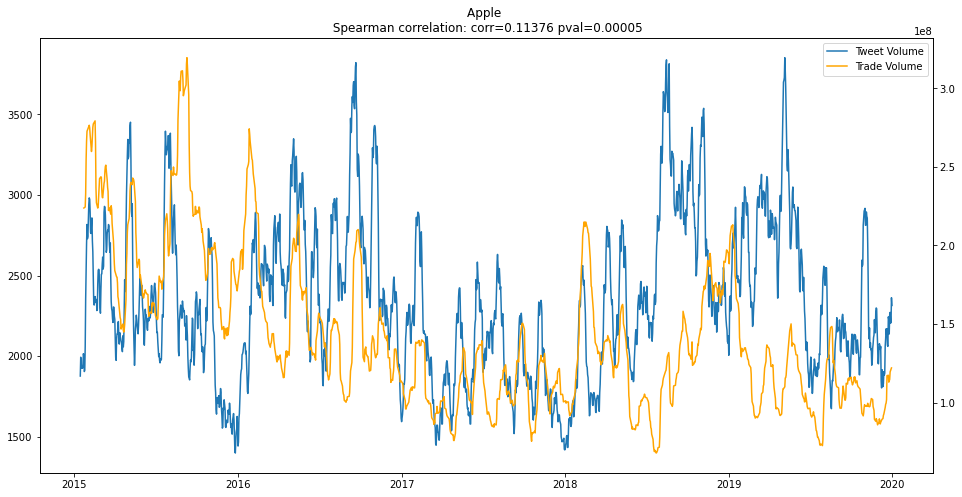

In [196]:
tweet_volume_effect(aapl,aapl_stock,'Apple')

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


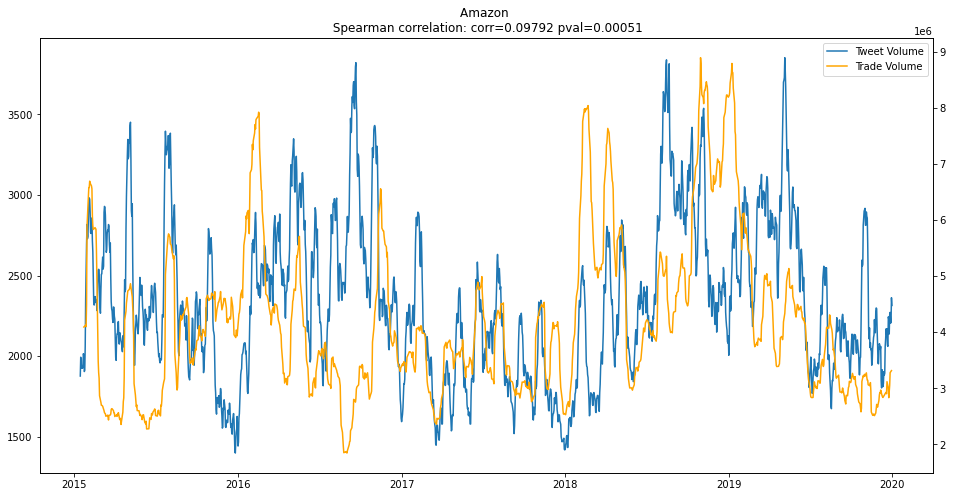

In [197]:
tweet_volume_effect(amzn,amzn_stock,'Amazon')

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


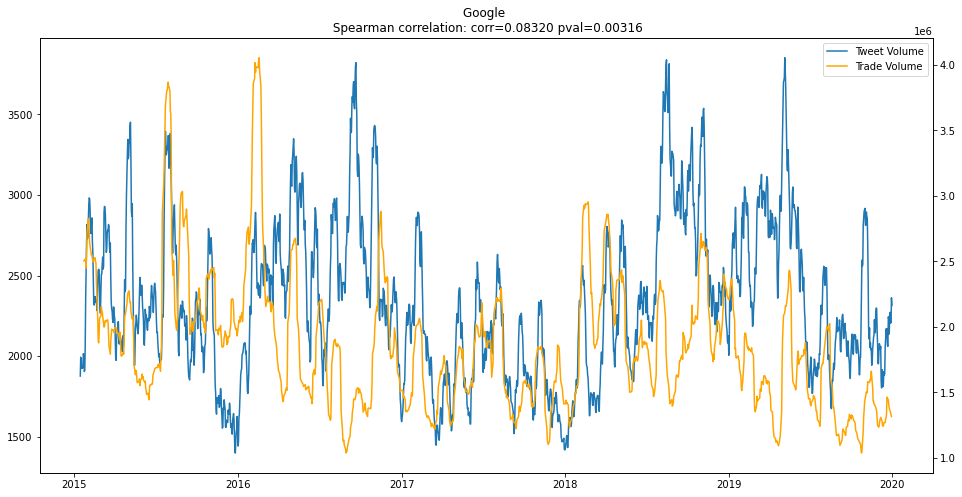

In [198]:
tweet_volume_effect(googl,googl_stock,'Google')

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


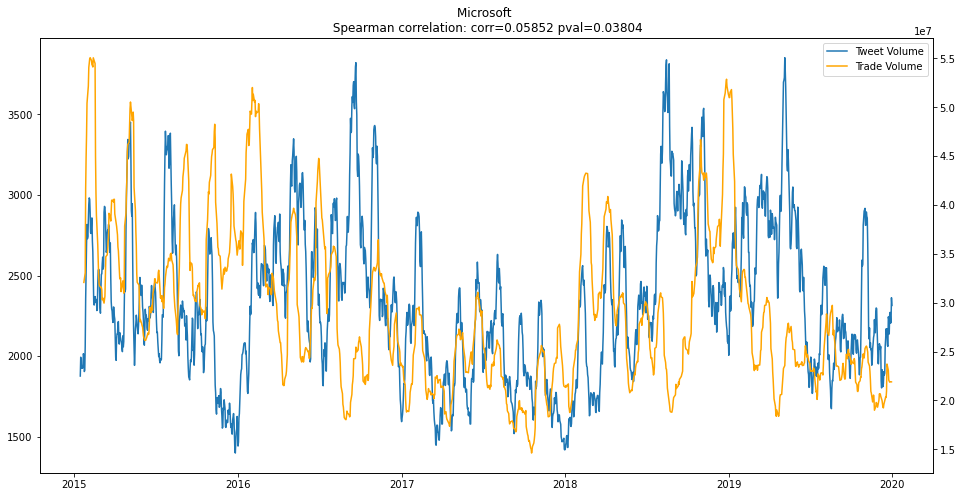

In [199]:
tweet_volume_effect(msft,msft_stock,'Microsoft')

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


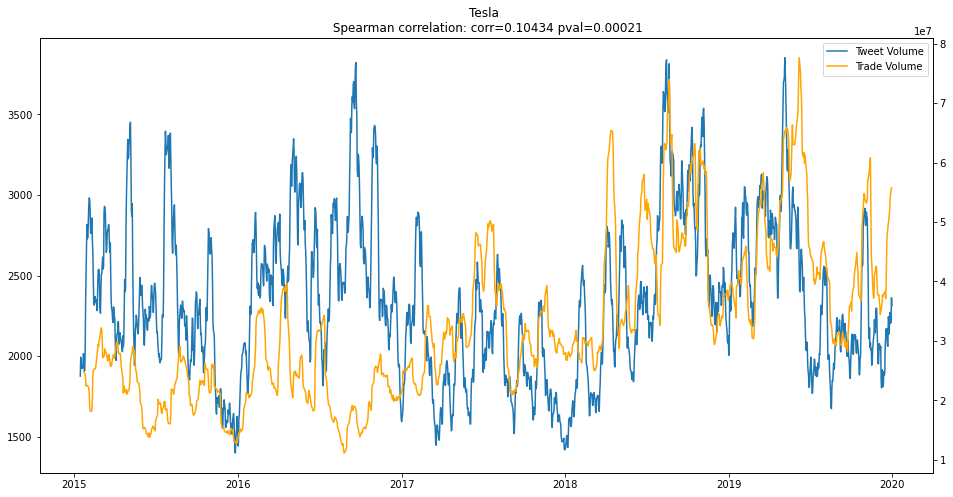

In [200]:
tweet_volume_effect(tsla,tsla_stock,'Tesla')

In [154]:
#make an instance of Afinn
afinn = Afinn()

In [155]:
#Have Afinn assign scores to all the tweets in the different datasets for each stock
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
amzn['score'] =  amzn['body'].apply(lambda tweet: afinn.score(tweet))
msft['score'] =  msft['body'].apply(lambda tweet: afinn.score(tweet))
googl['score'] =  googl['body'].apply(lambda tweet: afinn.score(tweet))
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [188]:
#test scores were applied correctly
def test_zero():
    actual = 666450
    
    count = 0
    
    for row in aapl['score']:
        if row == 0:
            count+=1
            
    assert actual == count,"Count not equal"
    
    print("Zero count correct")
    
    return True

In [189]:
test_zero()

Zero count correct


True

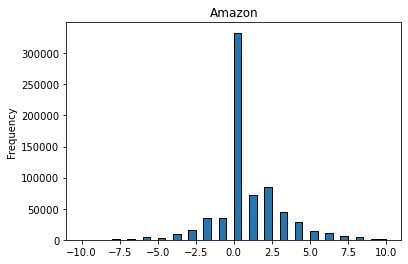

In [190]:
#I wanted to see a distribution of the scores from the process
amzn.score.plot(kind='hist',range=(-10,10),bins=40,edgecolor='black', title = "Amazon");

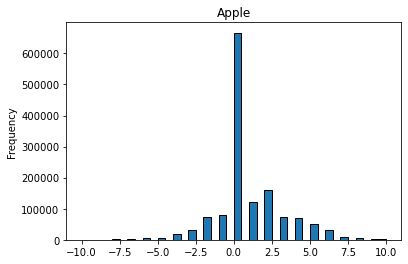

In [191]:
aapl.score.plot(kind='hist',range=(-10,10),bins=40,edgecolor='black', title = "Apple");

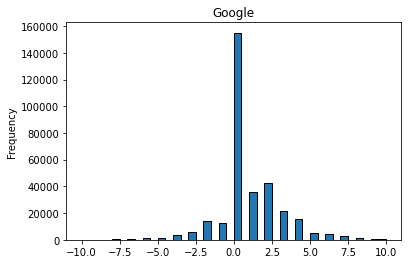

In [192]:
googl.score.plot(kind='hist',range=(-10,10),bins=40,edgecolor='black', title = "Google");

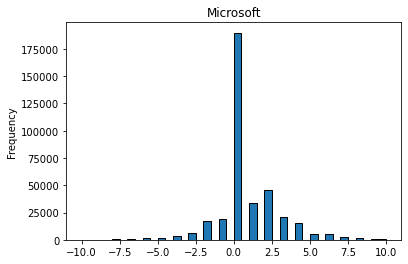

In [193]:
msft.score.plot(kind='hist',range=(-10,10),bins=40,edgecolor='black', title = "Microsoft");

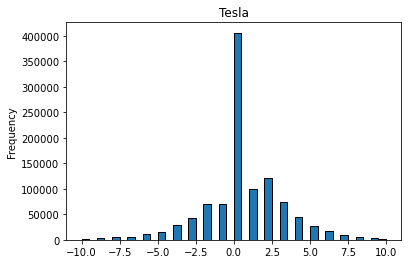

In [194]:
tsla.score.plot(kind='hist',range=(-10,10),bins=40,edgecolor='black', title = "Tesla");

In [214]:
#comparing the sentiment of tweets to the stock price over time
def sentiment_over_time(tweets, stock, title):
    
    #using a 15 day mean again for price
    visual= tweets.groupby('date')['score'].mean().shift(-1).rolling(15).mean().dropna()
    #test correlation
    corr_test = tweets.groupby('date')['score'].mean().shift(-1).dropna()
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Open'],nan_policy='omit')

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    #plot sentiment
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    #plot closing price
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice" +"\n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


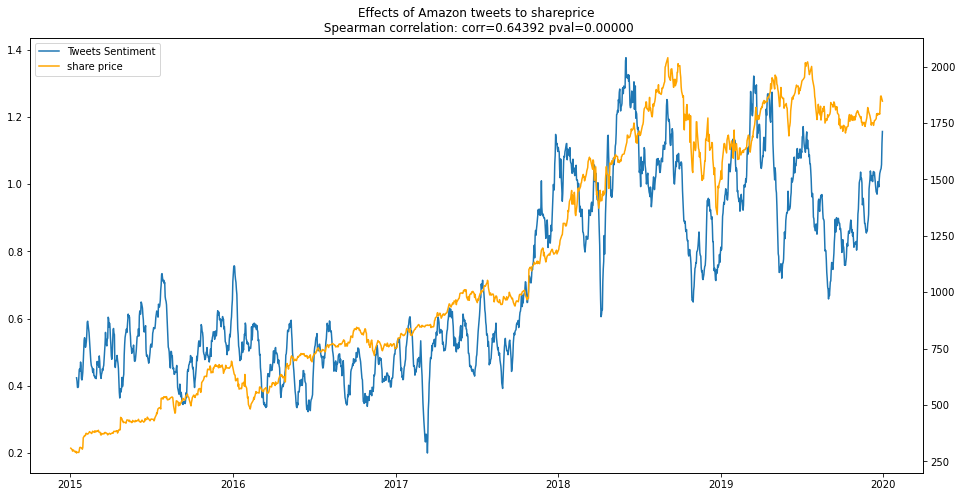

In [215]:
#Make graphs
sentiment_over_time(amzn,amzn_stock,"Amazon");

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


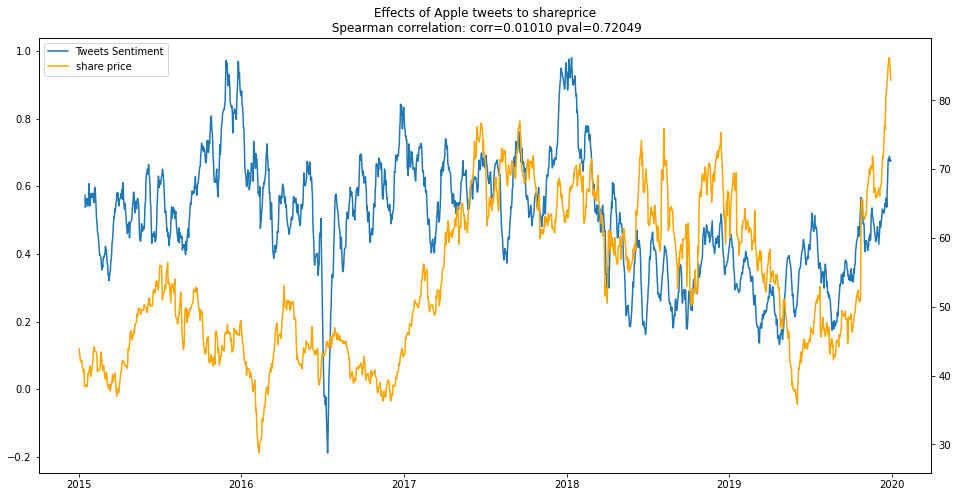

In [216]:
sentiment_over_time(tsla,tsla_stock,"Apple");

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


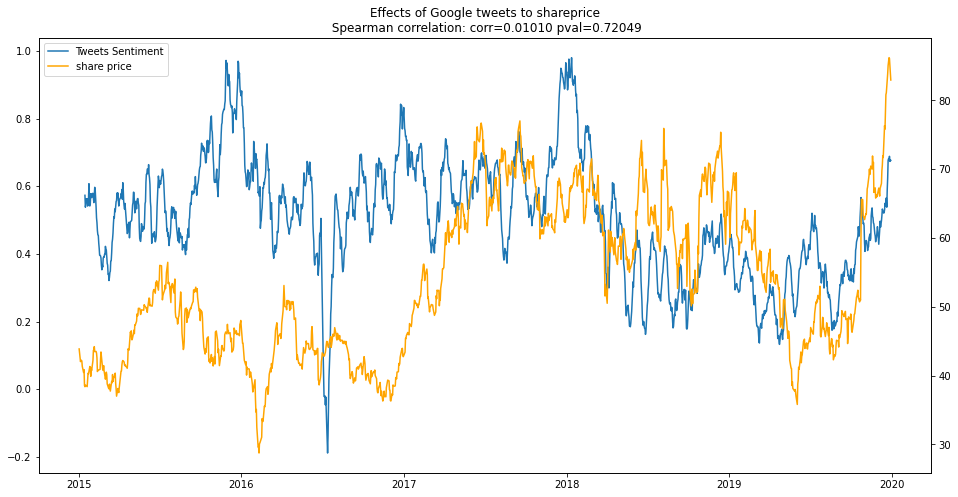

In [217]:
sentiment_over_time(tsla,tsla_stock,"Google");

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


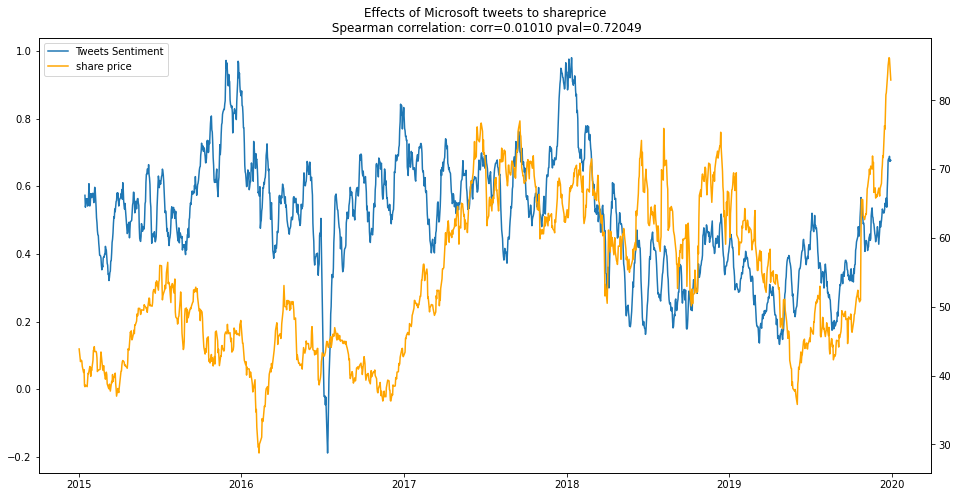

In [218]:
sentiment_over_time(tsla,tsla_stock,"Microsoft");

C:\Users\Thomas McShane\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


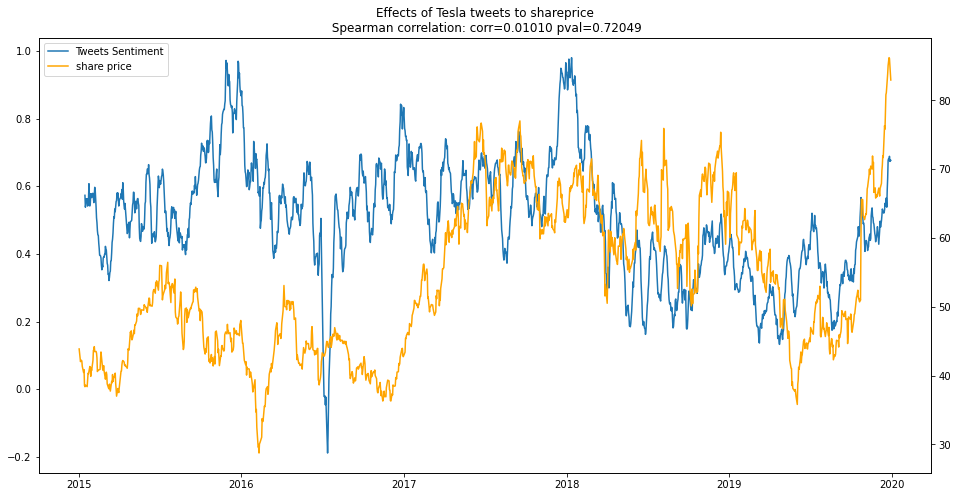

In [219]:
sentiment_over_time(tsla,tsla_stock,"Tesla");